In [2]:

# | Column        | Description |
# |---------------|-------------|
# | age        | Age of the patient (in years) |
# | sex        | Sex of the patient (1 = male, 0 = female) |
# | cp         | Chest pain type (0–3):<br>0 = Typical angina<br>1 = Atypical angina<br>2 = Non-anginal pain<br>3 = Asymptomatic |
# | trestbps   | Resting blood pressure (in mm Hg) |
# | chol       | Serum cholesterol (in mg/dl) |
# | fbs        | Fasting blood sugar (>120 mg/dl, 1 = true; 0 = false) |
# | restecg    | Resting electrocardiographic results:<br>0 = Normal<br>1 = ST-T wave abnormality<br>2 = Left ventricular hypertrophy |
# | thalach    | Maximum heart rate achieved |
# | exang      | Exercise-induced angina (1 = yes; 0 = no) |
# | oldpeak    | ST depression induced by exercise (compared to rest) |
# | slope      | Slope of the peak exercise ST segment:0 = Upsloping<br>1 = Flat<br>2 = Downsloping |
# | ca         | Number of major vessels (0–3) colored by fluoroscopy |
# | thal       | Thalassemia:0 = Normal 1 = Fixed defect 2 = Reversible defect (Values may be encoded as 1, 2, 3 depending on preprocessing) |
# | target     | Target variable:1 = Heart disease present 0 = No heart disease |


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('heart.csv')

In [12]:
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [16]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [18]:
print(df['target'].value_counts())

target
1    526
0    499
Name: count, dtype: int64


In [20]:
X = df.drop('target', axis=1)
y = df['target']

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [28]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [30]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [32]:
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("SVM", y_test, svm_pred)


Logistic Regression Results:
Accuracy: 0.7951219512195122
Confusion Matrix:
 [[73 29]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


Random Forest Results:
Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


SVM Results:
Accuracy: 0.8878048780487805
Confusion Matrix:
 [[85 17]
 [ 6 97]]
Classification Report:
  

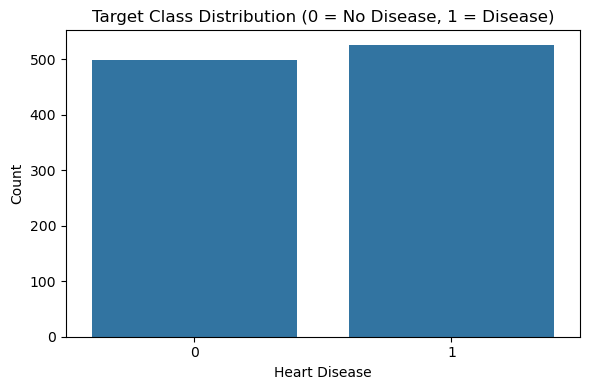

In [34]:
# --- Plot 1: Class Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution (0 = No Disease, 1 = Disease)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

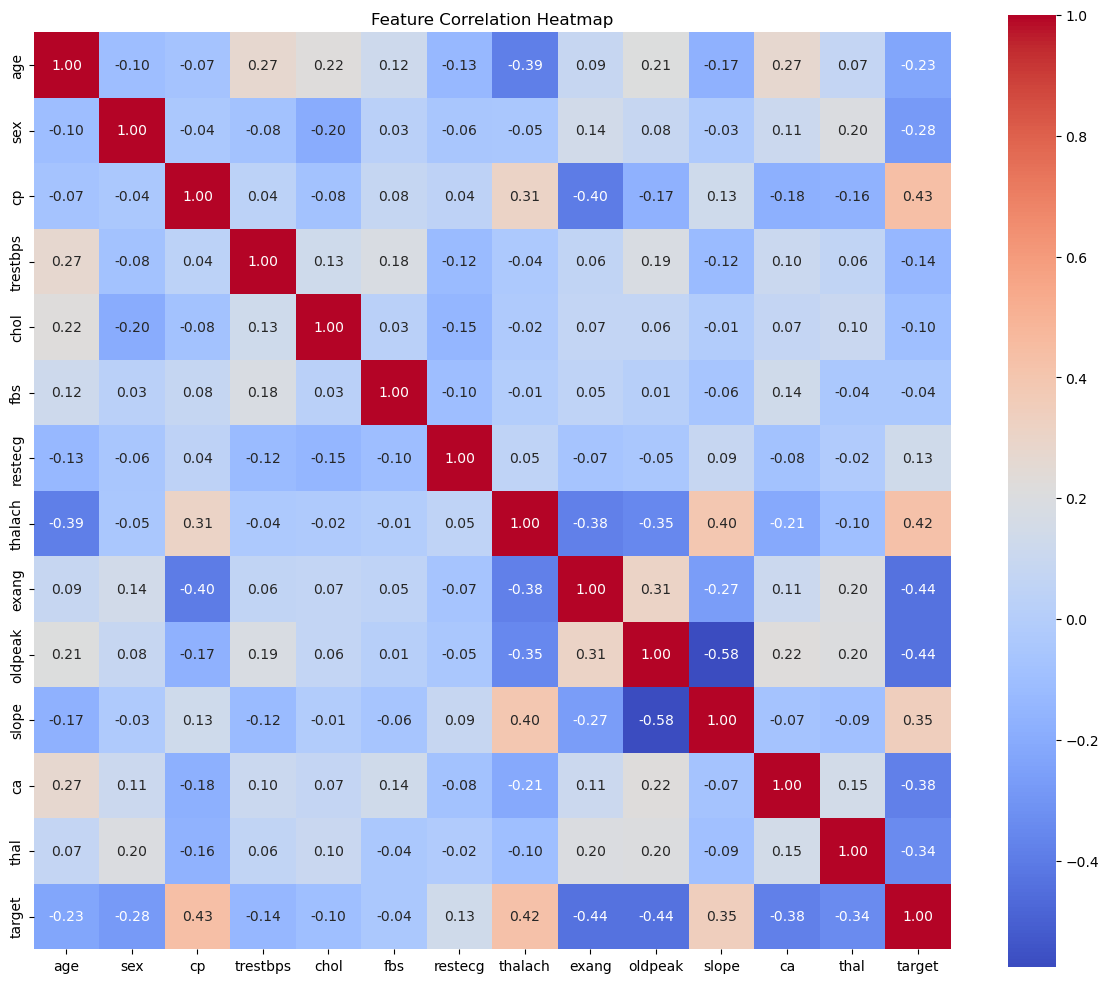

In [36]:
# --- Plot 2: Correlation Heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

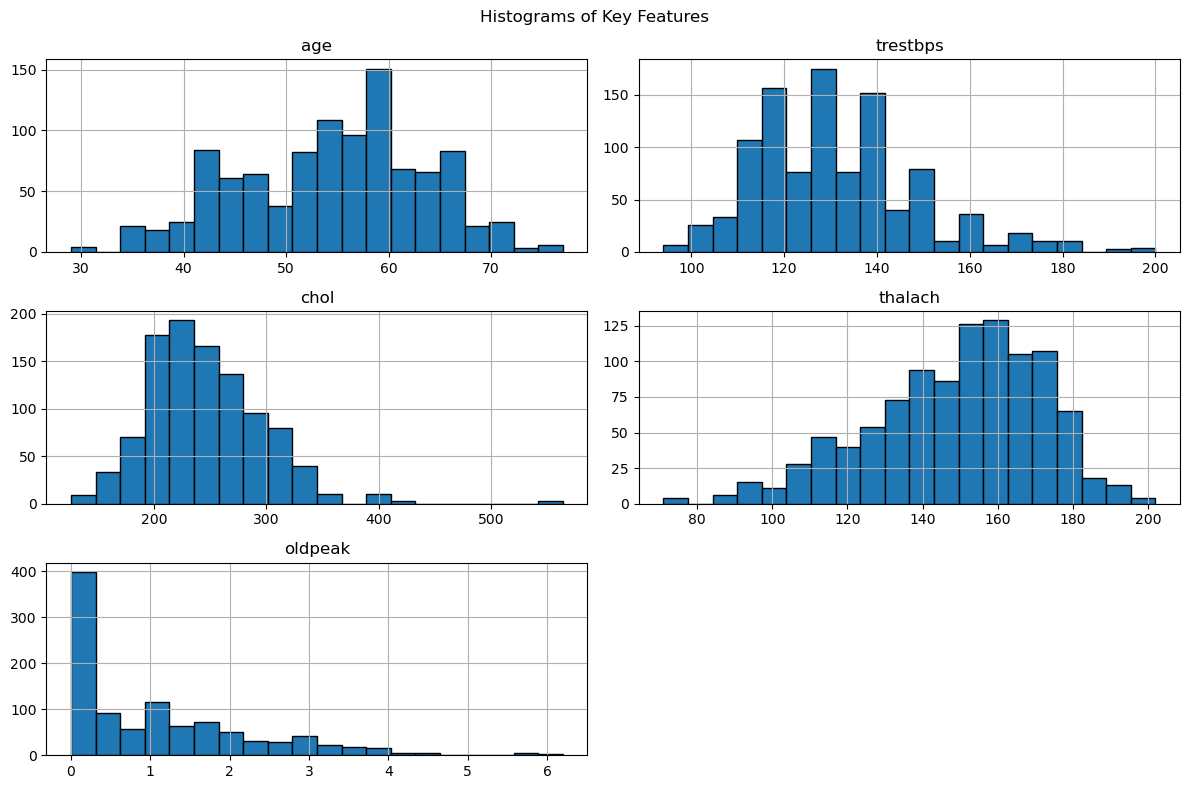

In [38]:
# --- Plot 3: Histogram of Key Features ---
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[features].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle('Histograms of Key Features')
plt.tight_layout()
plt.show()

In [40]:
# Comparison of all the models

In [46]:
# Collect accuracy scores
accuracies = {
    'Logistic Regression': accuracy_score(y_test, lr_pred),
    'Random Forest': accuracy_score(y_test, rf_pred),
    'SVM': accuracy_score(y_test, svm_pred)
}

C:\Users\rouna\AppData\Local\Temp\ipykernel_3708\3620017976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')


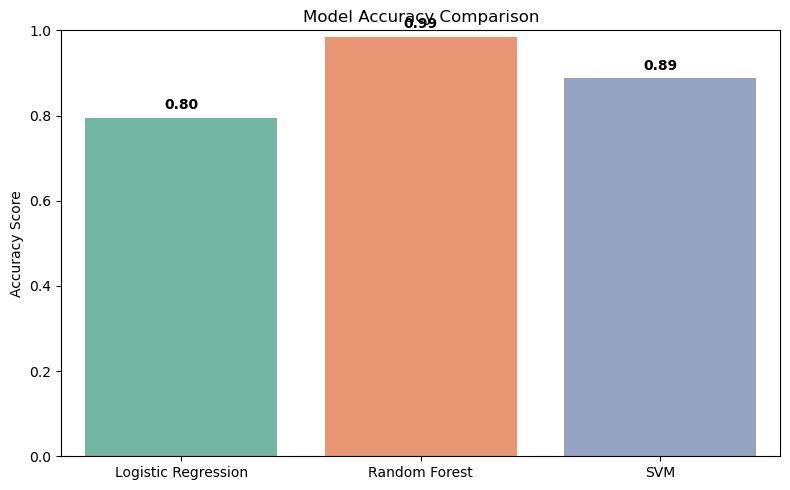

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [4]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install nbconvert[webpdf]


   ---------------------------------------- 0.0/34.9 MB ? eta -:--:--
    --------------------------------------- 0.8/34.9 MB 8.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.4/34.9 MB 7.5 MB/s eta 0:00:05
   ----- ---------------------------------- 4.5/34.9 MB 8.4 MB/s eta 0:00:04
   ------- -------------------------------- 6.6/34.9 MB 8.8 MB/s eta 0:00:04
   ----------- ---------------------------- 9.7/34.9 MB 10.2 MB/s eta 0:00:03
   --------------- ------------------------ 13.9/34.9 MB 11.8 MB/s eta 0:00:02
   -------------------- ------------------- 17.6/34.9 MB 12.7 MB/s eta 0:00:02
   -------------------------- ------------- 23.1/34.9 MB 14.5 MB/s eta 0:00:01
   ------------------------------- -------- 27.3/34.9 MB 15.7 MB/s eta 0:00:01
   --------------------------------- ------ 28.8/34.9 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------  34.6/34.9 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------- 34.9/34.9 MB 15.2 MB/s eta

In [11]:
pip--allow-chromium-download


Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\ProgramData\anaconda3\python.exe -m pip <command> [options]

no such option: --allow-chromium-download
